In [1]:
pip install seaborn

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------- ----- 7.1/8.1 MB 36.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 32.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 29.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ------------------------------- -------- 5.5/7.0 MB 27.2 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 26.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("Boston.csv")
df.head()


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df_clean=df.drop(columns="Unnamed: 0")
df_clean.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Question 1:

Report the “class” of the data set. How many rows and columns are in this data set? What do the rows and columns represent?

In [14]:
print("The class of the data set is",type(df_clean))

The class of the data set is <class 'pandas.core.frame.DataFrame'>


In [12]:
print("The number of rows are",df_clean.shape[0])
print("The number of Columns are",df_clean.shape[1])

The number of rows are 506
The number of Columns are 14


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


The rows of the datasheet represent the individual suburbs.
the colums of the datsheet represent the attributes of the individual suburbs.

In [7]:
df_clean.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Question 2:

Create a smaller data set with the variables median value of owner-occupied homes, per capita crime rate, nitrogen oxides concentration, proportion of blacks and percentage of lower status of the population. 
Choosing median value of owner occupied homes as the response and the rest as the predictors, make scatter plots of the response versus each predictor. 
Present the scatter plots in different panels of the same graph. 
Comment on your findings.

In [8]:
cols = ["crim","nox","black","lstat","medv"]
small_df=df_clean[cols]
small_df

,crim,nox,black,lstat,medv
0,0.00632,0.538,396.90,4.98,24.0
1,0.02731,0.469,396.90,9.14,21.6
2,0.02729,0.469,392.83,4.03,34.7
3,0.03237,0.458,394.63,2.94,33.4
4,0.06905,0.458,396.90,5.33,36.2
...,...,...,...,...,...
501,0.06263,0.573,391.99,9.67,22.4
502,0.04527,0.573,396.90,9.08,20.6
503,0.06076,0.573,396.90,5.64,23.9
504,0.10959,0.573,393.45,6.48,22.0


<function matplotlib.pyplot.show(close=None, block=None)>

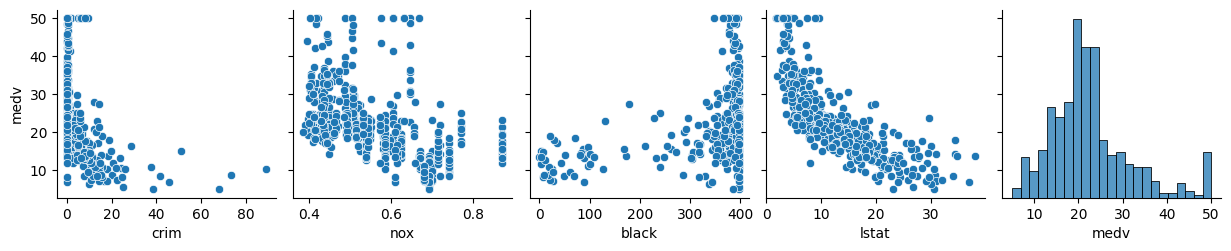

In [9]:
sns.pairplot(small_df, y_vars="medv",x_vars=("crim","nox","black","lstat","medv"))
plt.show

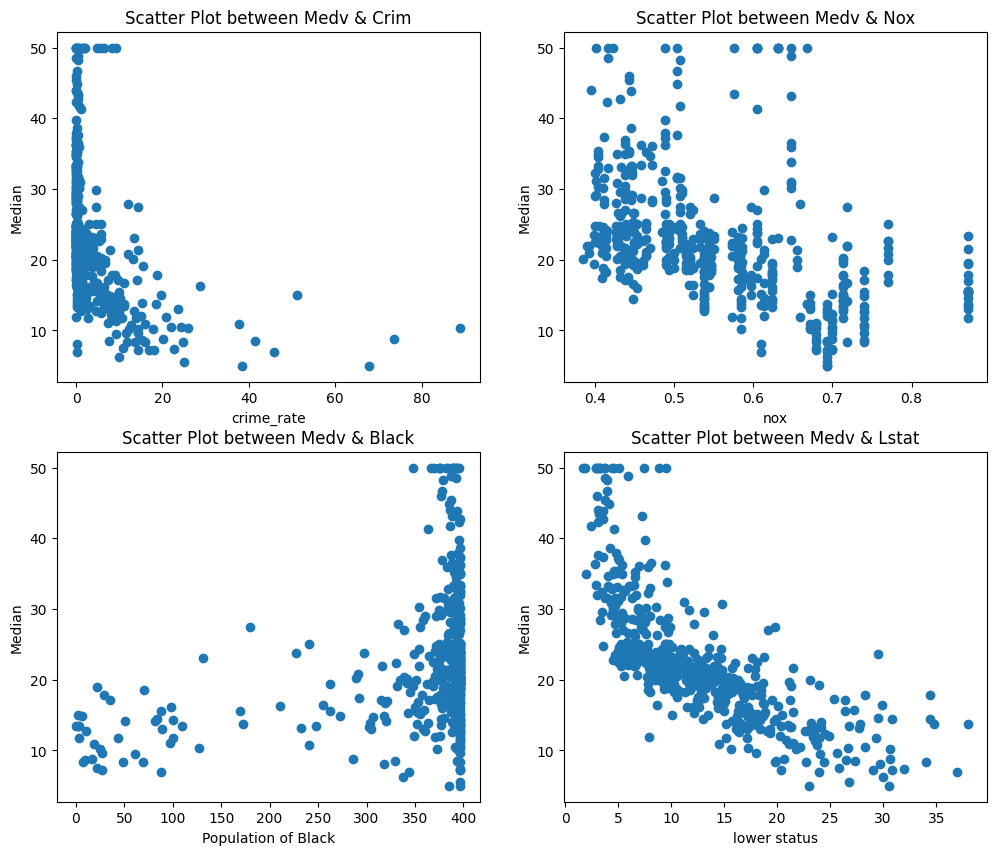

In [10]:
fig,axes = plt.subplots(2,2,figsize = (12,10))

axes[0,0].scatter(small_df["crim"],small_df["medv"])
axes[0,0].set_title("Scatter Plot between Medv & Crim")
axes[0,0].set_xlabel("crime_rate")
axes[0,0].set_ylabel("Median")

axes[0,1].scatter(small_df["nox"],small_df["medv"])
axes[0,1].set_title("Scatter Plot between Medv & Nox")
axes[0,1].set_xlabel("nox")
axes[0,1].set_ylabel("Median")

axes[1,0].scatter(small_df["black"],small_df["medv"])
axes[1,0].set_title("Scatter Plot between Medv & Black")
axes[1,0].set_xlabel("Population of Black")
axes[1,0].set_ylabel("Median")

axes[1,1].scatter(small_df["lstat"],small_df["medv"])
axes[1,1].set_title("Scatter Plot between Medv & Lstat")
axes[1,1].set_xlabel("lower status")
axes[1,1].set_ylabel("Median")

plt.tight_layout
plt.show()

**MEDV vs CRIM (Per capita crime rate)**
There is a clear negative relationship between crime rate and median house value. Areas with very low crime rates show a wide range of house prices, including the highest values, whereas higher crime rates are generally associated with lower MEDV. The relationship is non-linear, with a sharp drop in MEDV at low to moderate crime levels and a flattening at higher crime rates.

**MEDV vs NOX (Nitrogen oxides concentration)**
MEDV tends to decrease as NOX increases, indicating that higher pollution levels are associated with lower housing prices. The scatter shows a moderately strong negative trend, suggesting that air quality is an important determinant of property values.

**MEDV vs BLACK (Proportion of Black population)**
The relationship is weak and not strictly linear. MEDV appears more dispersed across values of BLACK, with many observations clustered at higher BLACK values. This suggests that BLACK alone is not a strong predictor of MEDV compared to other variables and may interact with additional socioeconomic factors.

**MEDV vs LSTAT (Percentage of lower status population)**
This plot shows a strong negative and non-linear relationship. As LSTAT increases, MEDV decreases sharply. This is the strongest relationship among all predictors, indicating that socioeconomic status is a major determinant of housing prices.

Question 3:

Which suburb of Boston has lowest median value of owner-occupied homes? What are the values of the other predictors mentioned in (2), for that suburb. How do these values compare to the overall ranges for those predictors? 
Comment on your findings. 
Hint: Mention which percentile these values belong to.

In [11]:
small_df["medv"].min()

np.float64(5.0)

In [23]:
small_df["medv"].idxmin()

398

In [27]:
lowest_sub = small_df.loc[small_df["medv"].idxmin()]
lowest_sub

crim      38.3518
nox        0.6930
black    396.9000
lstat     30.5900
medv       5.0000
Name: 398, dtype: float64

In [31]:
small_df[["crim","nox","black","lstat"]].rank(pct = True).loc[small_df["medv"].idxmin()]

crim     0.988142
nox      0.844862
black    0.881423
lstat    0.978261
Name: 398, dtype: float64

In [32]:
small_df[["crim","nox","black","lstat"]].describe()

,crim,nox,black,lstat
count,506.000000,506.000000,506.000000,506.000000
mean,3.613524,0.554695,356.674032,12.653063
std,8.601545,0.115878,91.294864,7.141062
min,0.006320,0.385000,0.320000,1.730000
25%,0.082045,0.449000,375.377500,6.950000
50%,0.256510,0.538000,391.440000,11.360000
75%,3.677083,0.624000,396.225000,16.955000
max,88.976200,0.871000,396.900000,37.970000


**CRIM (Per capita crime rate):**
The crime rate variable shows a highly right-skewed distribution. While the median crime rate is very low, the mean is considerably higher due to a few neighborhoods with extremely high crime values. This indicates that most areas experience low crime, but a small number of locations act as outliers and significantly increase the average. Such skewness suggests that crime may have a non-linear impact on housing values and could require transformation before modeling.

**NOX (Nitrogen oxides concentration):**
NOX displays relatively low variability across observations, with the mean and median being quite close. This indicates a fairly symmetric distribution and suggests that pollution levels do not vary drastically among neighborhoods. Despite this limited spread, NOX still plays an important role in explaining housing prices, as even small increases in pollution are associated with noticeable declines in median home values.

**BLACK (Proportion of Black population):**
The BLACK variable is heavily concentrated near its upper values, with the median and upper quartile very close to the maximum. This reflects a left-skewed distribution and limited variation for most neighborhoods. As a result, BLACK alone may not strongly explain variations in housing prices and is more likely to act in combination with other socioeconomic factors rather than as an independent predictor.

**LSTAT (Percentage of lower status population):**
LSTAT shows substantial variation across neighborhoods, with values spanning a wide range. The mean being slightly higher than the median indicates mild right skewness. This wide dispersion supports its strong explanatory power, as differences in socioeconomic status are closely linked to changes in housing prices. Among all variables considered, LSTAT appears to be the most influential predictor of median house value.
comment


Question 4:

Does any suburb of Boston stand out for having notably high crime rates tax rates, or pupil–teacher ratios? 
Hint: Use a boxplot to detect any outliers. If so, identify the suburbs that show the outlier values.

Text(0.5, 1.0, 'Box Plot of Pupil Teacher Ratio')

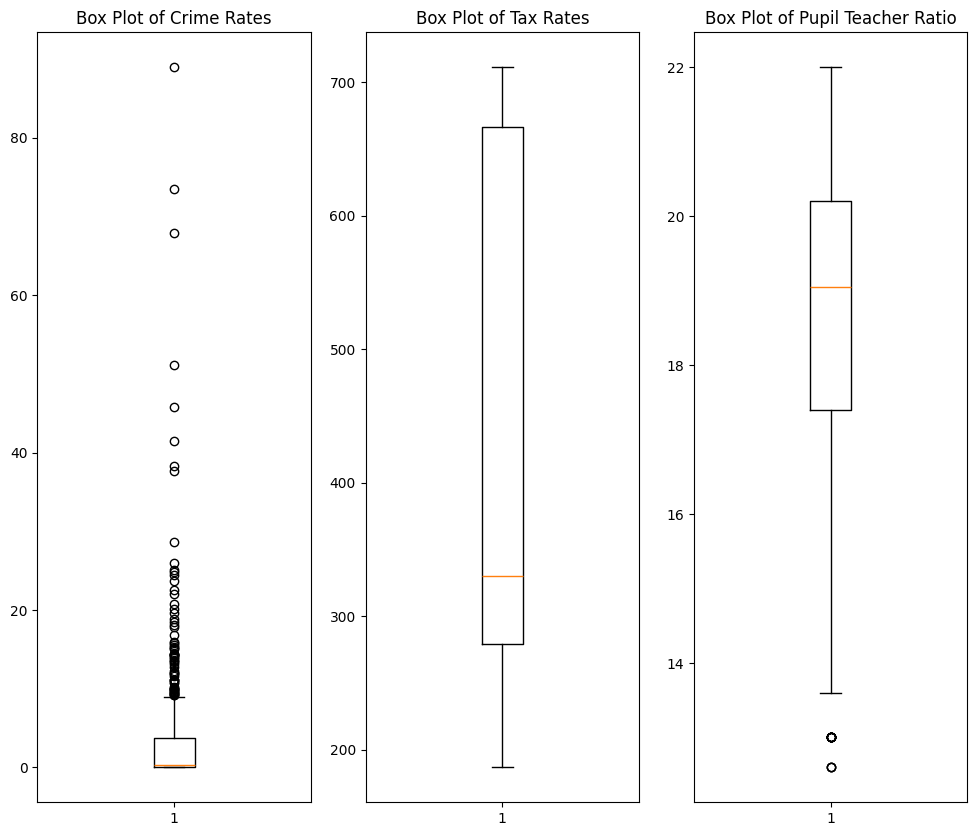

In [35]:
fig, axes = plt.subplots(1, 3, figsize = (12, 10))

axes[0].boxplot(df_clean["crim"])
axes[0].set_title("Box Plot of Crime Rates")

axes[1].boxplot(df_clean["tax"])
axes[1].set_title("Box Plot of Tax Rates")

axes[2].boxplot(df_clean["ptratio"])
axes[2].set_title("Box Plot of Pupil Teacher Ratio")

In [36]:
def findoutliers(colms):
    Q1 = colms.quantile(0.25)
    Q3 = colms.quantile(0.75)
    iqr = Q3 - Q1

    lower = Q1 - 1.5*iqr
    upper = Q3 + 1.5*iqr

    return colms[(colms < lower)|(colms > upper)]

In [37]:
crime_outliers = findoutliers(df_clean["crim"])
crime_outliers

367    13.5222
371     9.2323
373    11.1081
374    18.4982
375    19.6091
        ...   
468    15.5757
469    13.0751
477    15.0234
478    10.2330
479    14.3337
Name: crim, Length: 66, dtype: float64

In [38]:
tax_outliers = findoutliers(df_clean["tax"])
tax_outliers

Series([], Name: tax, dtype: int64)

In [39]:
pratio_outliers = findoutliers(df_clean["ptratio"])
pratio_outliers

196    12.6
197    12.6
198    12.6
257    13.0
258    13.0
259    13.0
260    13.0
261    13.0
262    13.0
263    13.0
264    13.0
265    13.0
266    13.0
267    13.0
268    13.0
Name: ptratio, dtype: float64